In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn

X1 = np.round(np.random.RandomState(42).normal(1.73,0.1,size=300), 2)

# <center> Treinamento de Probabilidade e Inferência Estatística (31/08/2022) </center>

# <center> Parte 2: Inferência Estatística </center>

**Inferência Estatística**: o processo de tirar conclusões sobre informações populacionais (ou seja, informações da variável aleatória $X$) a partir de uma amostra da população.

Imagine um cenário prático real. Suponha que estamos interessados em estimar a altura média da população brasileira. Poderíamos dar um jeito de registrar todos os mais de 200 milhões de habitantes em um super censo custoso e complexo. Entretanto, muitas vezes o valor exato não nos importa tanto, uma aproximação suficientemente boa já nos basta, entendendo o erro associada à nossa afirmação. Em outros casos, isso é simplesmente inviável.

Um exemplo de inferência é selecionar alguns indivíduos brasileiros e tirar a média dessa subpopulação (amostra).

In [2]:
# X1

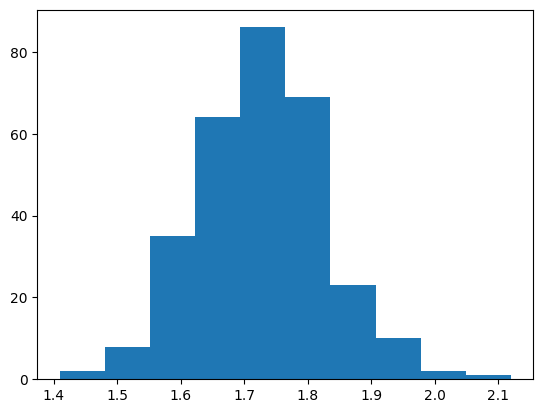

In [3]:
plt.hist(X1)
plt.show()

In [4]:
X1.mean().round(4)

1.7298

## Amostragem

Mas como garantir que a distribuição da variável na nossa amostra é significativamente parecida com a distribuição da variável na população geral? Existem várias técnicas clássicas de amostragem que tentam garantir isso:

- Amostragem Aleatória Simples

Todos os elementos da população têm uma chance igual de serem selecionados.

- Amostragem Estratificada

A distribuição de uma variável conhecida é mantida na amostra.

![](images_infer/estr_sample.png)

Na teoria de probabilidade, a ideia é pensar que cada uma das variáveis observadas é a observação de uma variável aleatória que tem distribuição igual a distribuição da população original. Quando tiramos uma amostra, estamos evaluando essas variáveis aleatórias.

**Definição (amostra aleatória)**: Dizemos que o conjunto das variáveis aleatórias $X_1$, $\cdots$, $X_n$ é **amostra aleatória de $X$ tamanho $n$** se são independentes e identicamente distribuídas com distribuição igual à da variável aleatória $X$. Ela pode ser denotada pelo vetor aleatório $\tilde{X}=(X_1, \cdots,X_n)$.

## Modelo estatístico (paramétrico)

Um modelo estatístico é definido por uma família de probabilidades $\mathcal{X}$ que **possivelmente** descrevem o comportamento probabilístico dos dados.

Na prática, estamos assumindo que $X\in \mathcal{X}$. Ou seja, estamos restringindo o comportamento da variável aleatória para um subconjunto de possíveis variáveis aleatórias. Em particular, na estatística paramétrica, estamos supondo que a distribuição de $X$ pode ser parametrizada por algum argumento $\theta\in\Theta\subset \mathbb{R}^n$. Isto é, podemos escrever $X\sim f_\theta$ para definir unicamente os elementos de $\mathcal{X}$, portanto, podemos escrever $\mathcal{X} = \{X\sim f_\theta : \theta\in\Theta\}$.

Neste caso, qualquer **quantidade de interesse** da população é escrita como $g(\theta)$.

![](images_infer/amount_1.png)

![](images_infer/amount_2.png)

![](images_infer/amount_3.png)

Estamos fazendo perguntas sobre um atributo populacional que não podemos medir diretamente. Mas podemos medir na nossa amostra observada.

**Definição (amostra observada)**: São os valores efetivamente observados após executar o experimento. Costuma ser denotado pela letra da variável aleatória minúscula

$$ \tilde{x} = (x_1,\cdots,x_n).$$

# Função de verossimilhança da amostra

**Definição (função de verossimilhança)**: Seja $\tilde{X}=(X_1,\cdots,X_n)$ uma amostra aleatória de $X\sim f_{\theta}$, $\theta \in \Theta$. A função de verossimilhança é a função (densidade) de probabilidade calculada no $\tilde{x}$ observado. Neste caso, $\theta$ é o argumento.

$$ \mathscr{L}_{\tilde{x}}(\theta) = f_\theta(\tilde{x}) = \Pi_{i=1}^n f_\theta(x_i) , $$

ou

$$ \mathscr{L}_{\tilde{x}}(\theta) = P_\theta(\tilde{X} = \tilde{x}) = \Pi_{i=1}^n P_\theta(X_i = x_i)  . $$

Notação alternativa: $\mathscr{L}(\theta\,; \tilde{x}) $

Lembrando que a amostra aleatória implica em independência. Por isso, podemos quebrar $\mathscr{L}_{\tilde{x}}$ na multiplicação.

**Exemplo**: Suponha que nosso modelo estatístico seja da forma

$$ X_\theta \sim f_\theta(x) = \frac{1}{\sqrt{2\pi}} \,\exp\left({-\frac{(x-\theta)^2}{2}}  \right),\,\,\, \theta\in(-1,1)\subset\mathbb{R}.$$

Vamos calcular a função de verossimilhança para uma amostra observada $\tilde{x}=$`X2`.

In [5]:
theta = np.random.RandomState(42).uniform(-1, 1)
X2 = np.random.RandomState(42).normal(theta, 1, size=400)

In [6]:
# X2

In [7]:
def densidade_normal(theta, x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-(x-theta)**2/2)

In [8]:
densidade_normal(0, 0)

0.3989422804014327

In [9]:
def verossimilhanca(theta, vetor_x, densidade):
    aux = 1
    for x in vetor_x:
        aux *= densidade(theta, x)
    return aux

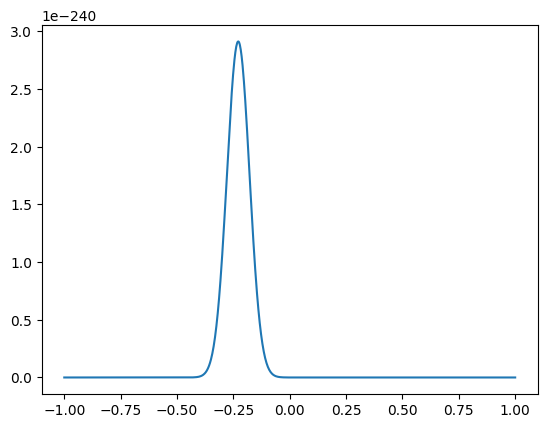

In [10]:
valores_theta = np.linspace(-1, 1, 1000)
ver = verossimilhanca(valores_theta, X2, densidade_normal)

plt.plot(valores_theta, ver)
plt.show()

In [11]:
theta

-0.250919762305275

## Estimadores e estimativas

**Definição (estatística)**: Uma estatística é uma função da amostra aleatória.

![](images_infer/estimators.png)

Em que denoto a função indicadora tal que $\mathbb{1}(\textrm{True})=1$ e $\mathbb{1}(\textrm{False})=0$.

**Definição (estimador pontual)**: Um **estimador** é uma estatística cujo objetivo é estimar uma quantidade $g(\theta)$.

É esperado que a imagem do estimador esteja contida em $g(\Theta) = \{ g(\theta) : \theta \in \Theta \}$.

**Definição (estimativa)**: Uma **estimativa** é o valor numérico de um estimador que foi calculado usando a amostra observada.

![](images_infer/estimate.png)

Uma parte da estatística está interessada em construir estimadores com propriedades boas! Uma das técnicas é utilizar o método de máxima verossimilhança.

## Viés e variância de um estimador

O **víes** de um estimador $T(\tilde{X})$ com objetivo de calcular uma quantidade de interesse $g(\theta)$ é

$$ \textrm{Viés}_\theta(T(\tilde{X})) = \mathbb{E}_\theta\left(T(\tilde{X}) - g(\theta) \right).$$

A sua variância é explicitamente $\textrm{Var}_\theta(T(\tilde{X}))$.

É de interesse ter estimadores **não-viciados (ou não-viesados)**, ou seja, estimadores com viés 0. Além disso, esperamos ter variância baixa.

O **ENVVUM (estimador não-viesado com variância uniformemente mínima)** é um estimador não-viesado que tem, dado outro estimador não-viciado, variância menor que a dele.

$\oint$ *Existe um valor mínimo que a variância de um estimador não-viesado pode ter. Ela é chamada de limite inferior de Cramer-Rao e está relacionada com a informação de Fisher.*

Existem várias técnicas interessantes para construir estimadores, como o método de momentos, o método de mínimos quadrados, o teorema de Lehmann-Scheffé etc. Vamos comentar sobre um dos mais clássicos, o estimador de máximaa verossimilhança.

## Máxima verossimilhança

Neste método, encontramos o $\theta$ que melhor adapta $\tilde{x}$ aos dados observados, aos olhos da verossimilhança $\mathscr{L}_{\tilde{x}}(\theta)$. Isto é, o valor que maxima essa quantidade. Denotamos o $\theta$ estimado por $\widehat{\theta}_{MV}$. Além disso, é possível calcular a estimativa de máxima verossimilhança de $g(\theta)$ como $g(\widehat{\theta}_{MV})$, pela invariância do estimador de máxima verossimilhança.

Para achar o argumento $\theta$ que maximiza $\mathscr{L}_{\tilde{x}}(\theta)$, podemos usar várias estratégias de maximização. 

Usualmente, achamos a raíz da equação

$$ \frac{d}{d\theta} \mathscr{L}_{\tilde{x}}(\theta) = 0 .$$

Nem sempre isso é trivial e, computacionalmente podemos ter problemas de [underflow](https://en.wikipedia.org/wiki/Arithmetic_underflow) (já que $\mathscr{L}_{\tilde{x}}$ é a multiplicação de vários valores menores do que 1). Como $\mathscr{L}_{\tilde{x}}(\theta)\geq 0$, já que é uma função densidade de probabilidade, podemos aplicar a função $\log(\cdot)$ (uma função monótona) e maximizar

$$ \log\left(  \mathscr{L}_{\tilde{x}}(\theta) \right)= \sum_{i=1}^n \log\left( f_\theta(x_i)  \right) .$$

Em outros casos pode ser preciso usar métodos numéricos para achar a raíz dessa equação.

**Exemplo**: Suponha que estamos analisando o tempo de ligações de uma determinada empresa. Por algum motivo, é razoável querer entender qual a probabilidade das ligações demorarem entre 4 e 5 minutos.

Nos é fornecido a seguinte amostra aleatória de 20 elementos de tempo de ligações:

In [12]:
X3 = np.array([0.202, 5.3267, 0.8842, 1.8331, 0.5744, 0.1402,
               5.119, 3.1183, 5.569, 0.7165, 0.365, 0.2521,
               1.5503, 1.2344, 3.6096, 0.3423, 5.0797,
               7.9643, 0.2668, 3.3204])

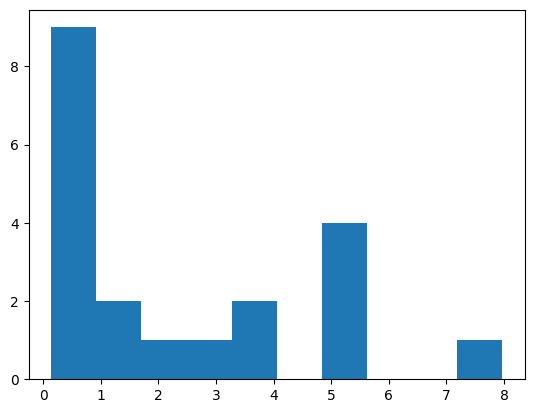

In [13]:
plt.hist(X3)
plt.show()

![](images_infer/estimator_prob_1.png)

In [14]:
(X3>4) & (X3<5)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [15]:
((X3>4) & (X3<5)).sum()

0

Podemos supor que os dados fazem parte de uma distribuição exponencial, ou seja, que $X\sim \textrm{Exp}(\theta)$ para $\theta\in (0,\infty)$. A partir disso podemos estimar $\theta$ e calcular uma estimativa para $g(\theta)$.

![](images_infer/estimator_prob_2.png)

In [16]:
def densidade_exponencial(theta, x):
    return theta*np.exp(-theta*x)

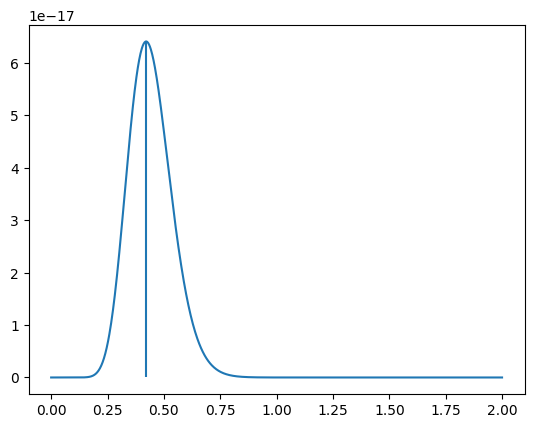

In [17]:
valores_theta = np.linspace(0,2,1000)
ver = verossimilhanca(valores_theta, X3, densidade_exponencial)

plt.plot(valores_theta, ver)
plt.vlines(valores_theta[np.argmax(ver)],np.min(ver),verossimilhanca(valores_theta[np.argmax(ver)], X3, densidade_exponencial))
plt.show()

In [18]:
valores_theta[np.argmax(ver)]

0.42042042042042044

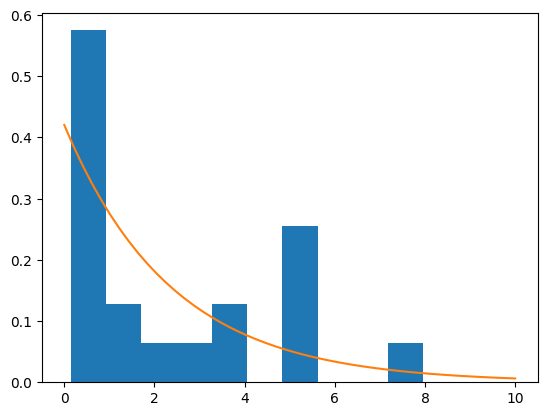

In [19]:
plt.hist(X3, density=True)
plt.plot(np.linspace(0,10), densidade_exponencial(valores_theta[np.argmax(ver)], np.linspace(0,10)))
plt.show()

In [20]:
np.exp(-4*valores_theta[np.argmax(ver)])-np.exp(-5*valores_theta[np.argmax(ver)])

0.06386153502253891

# Intervalos de confiança

Tudo bem, achamos uma estimativa **pontual** para nossa quantidade desejada $g(\theta)$. Sabemos que provavelmente esse não é o valor perfeito. Nossa estimativa depende da amostra que coletamos e existe uma aleatoriedade que nos diz que ela pode variar cada vez que realizamos o experimento. Em muitos casos, conseguimos estimar essas variações e calcular intervalos de confiança que nos permitem acreditar que nossa quantidade desejada real está em um certo intervalo com alta probabilidade.

A partir desses intervalos, podemos construir testes de hipótese validando se nossas estimativas pontuais são razoáveis.

In [21]:
theta = 3
np.random.RandomState(42).normal(theta, 1, size=50).mean()

2.7745260947438597

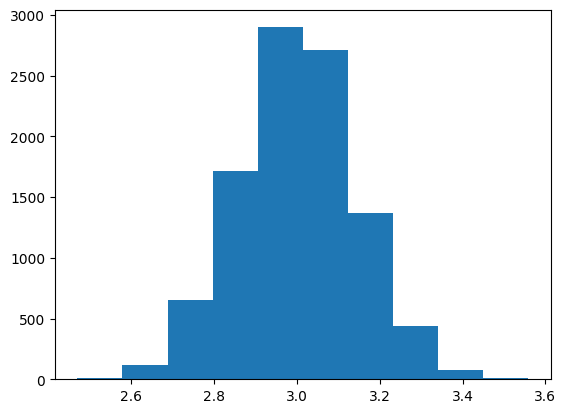

In [22]:
media_amostra = \
np.array(
    [np.random.RandomState(i).normal(theta, 1, size=50).mean() for i in range(10000)]
)

plt.hist(media_amostra)
plt.show()

In [23]:
((media_amostra > 2.72) & (media_amostra<3.28)).sum()/10000

0.9519

## Quantidade pivotal

Na prática, construir intervalos de confiança (teóricos ou aproximados) é uma tarefa díficil. Precisamos ter muita confiança no modelo estatístico que estamos usando (ou seja, precisamos definir bem $\mathcal{X}$), além de saber construir uma **quantidade pivotal**.

**Definição (quantidade pivotal)**: Dizemos que $M(g(\theta), \tilde{X})$ é uma quantidade pivotal (exata) para $g(\theta)$ se a sua distribuição não depende de $\theta$.

Uma função é dita quantidade pivotal para $g(\theta)$ aproximada quando, no limite de $n\to\infty$, sua distribuição não depende de $\theta$.

**Exemplo**: Seja $\tilde{X}=(X_1, \cdots, X_n)$ amostra aleatória de $X\sim \mathcal{N}(\theta, 1)$, $\theta\in\mathbb{R}$. Então as funções

$$ M_1(\theta, \tilde{X}) = X_1 - \theta ,$$

$$ M_2(\theta, \tilde{X}) = \sqrt{n}\left(\frac{\sum_{i=1}^n X_i}{n}-\theta \right),$$

são exemplos de quantidades pivotais, já que tanto $M_1(\theta, \tilde{X})$ quanto $M_2(\theta, \tilde{X})$ tem distribuição $\mathcal{N}(0,1)$ (que não depende de $\theta$).

## Construindo um intervalo de confiança

Não vou entrar em detalhes, mas a partir de um quantidade pivotal é possível construir um intervalo de confiança (com nível de confiança $\gamma\in(0,1)$). Basta existir $c_1^\gamma$ e $c_2^\gamma$ que satisfaçam a equação

$$ \mathbb{P}\left( c_1^\gamma \leq M(g(\theta), \tilde{X}) \leq c_2^\gamma \right) = \gamma,$$

e estatísticas $t_1^\gamma(\tilde{X})$ e $t_2^\gamma(\tilde{X})$ tais que 

$$ c_1^\gamma \leq M(g(\theta), \tilde{X}) \leq c_2^\gamma \Leftrightarrow t_1^\gamma(\tilde{X}) \leq g(\theta) \leq t_2^\gamma(\tilde{X}).$$

Neste caso temos o intervalo de confiança teórico:

$$ IC(g(\theta), \gamma) = [t_1^\gamma(\tilde{X}), t_2^\gamma(\tilde{X})] \cap g(\Theta).$$

Quando temos uma amostra observada $\tilde{x}$ de $\tilde{X}$, então obtemos o intervalo de confiança observado:

$$ IC_{obs}(g(\theta), \gamma) = [t_1^\gamma(\tilde{x}), t_2^\gamma(\tilde{x})] \cap g(\Theta).$$

# Intervalos de confiança com bootstrap

O bootstrap se baseia na primeira ideia que fizemos para construir o intervalo de confiança: repetir o experimento uma quantidade significativa de vezes para não ter apenas uma estimativa pontual, mas um conjunto grande de estimativas.

Mas como construir amostras diferentes do mesmo experimento quando só temos uma amostra? A ideia é **amostrar com repetição**. Amostras com repetição de um determinado conjunto vão manter aproximadamente a distribuição inicial:

In [24]:
amostra_inicial = np.random.RandomState(42).normal(theta, 1, size=500)

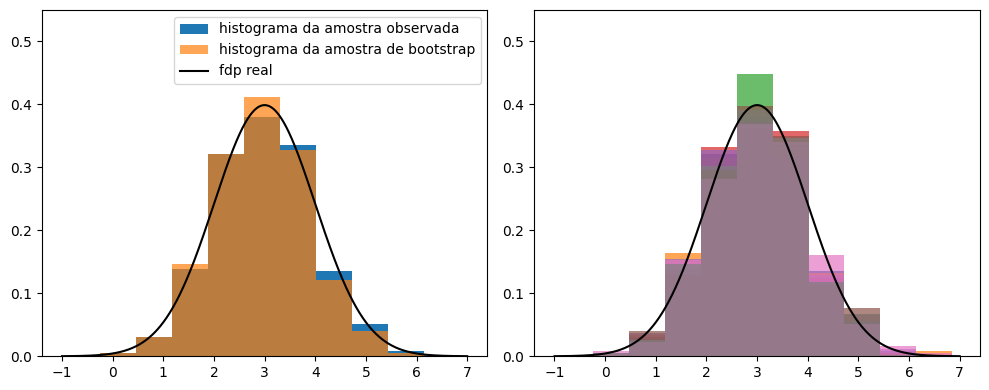

In [25]:
amostra_reposicao = np.random.RandomState(42).choice(amostra_inicial, replace=True, size=500)

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
_, bins, _ = ax[0].hist(amostra_inicial, density=True, label='histograma da amostra observada')
ax[0].hist(amostra_reposicao, bins=bins, alpha = 0.7, density=True, label='histograma da amostra de bootstrap')
x_ = np.linspace(-1, 7, 1000)
ax[0].plot(x_, scipy.stats.norm(loc=3, scale=1).pdf(x=x_), 'k', label='fdp real')

ax[1].hist(amostra_inicial, density=True)
for i in range(7):
    amostra_reposicao_for = np.random.RandomState(i).choice(amostra_inicial, replace=True, size=500)
    ax[1].hist(amostra_reposicao_for, bins=bins, alpha = 0.7, density=True)
ax[1].plot(x_, scipy.stats.norm(loc=3, scale=1).pdf(x=x_), 'k')

ax[0].set_ylim(0, 0.55)
ax[1].set_ylim(0, 0.55)
ax[0].legend()
plt.tight_layout()

Repare que todas as amostras que conseguimos por bootstrap seguem de maneira aproximada a distribuição da amostra observada, que por sua vez, segue aproximadamente a distribuição real da variável aleatória.

In [26]:
bootstraps = [np.random.RandomState(i).choice(amostra_inicial, replace=True, size=500).mean() for i in range(10000)]

A partir dessa amostra podemos fazer inferência sobre a quantidade de interesse (no nosso caso, o próprio $\theta$) pegando estatísticas relevantes como os percentis/quantis.

$\oint$: *A **função quantil (ou percentil)** $q_X:(0,1)\to\mathbb{R}$ é tal que*
$$ \mathbb{P}(X\leq q_X(\alpha)) = \alpha. $$

*(Na prática é um pouco mais chato que isso... Veja mais sobre a função quantil no meu [blog](https://vitaliset.github.io/covariate-shift-1-qqplot/) - shameless self promotion).*

In [27]:
np.percentile(bootstraps, q=[2.5, 97.5])

array([2.91989873, 3.09353478])

Neste caso, estamos pegando os valores que fazem com que 95% das nossas médias calculadas por bootstrap estejam limitados por eles. Diríamos que o intervalo de confiança de nível de confiança 95% é $[2.92, 3.09]$, que inclui o verdadeiro valor de $\theta$.

# Mais sobre inferência não paramétrica

Nem sempre será possível escolher $\mathcal{X}$ de maneira comportada (por vezes, você não vai querer fazer isso) sendo parametrizada por um parâmetro, como comentamos. Ainda assim, podemos estar interessados em fazer inferências sobre a nossa amostra.

Existe uma grande família de métodos para tentar lidar com esse problema. Inclusive o bootstrap é um deles. Outro que vale a pena ser mencionado é o Kernel Density Estimation (KDE), que é uma técnica bem simples de fazer uma aproximação da função densidade de probabilidade utilizando uma amostra observada.

Não vou dar muitos detalhes, mas a ideia é dar peso para as regiões ao redor da nossa amostra e ter como aproximação para a função densidade de probabilidade a média das funções menores. Um dos kerneis usados, nesse caso, é colocar funções gaussianas ao redor de cada um dos seus exemplos, o [`seaborn.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) faz isso quando você passa o parâmetro `kde=True`.

![](images_infer/kde_1.jpg)

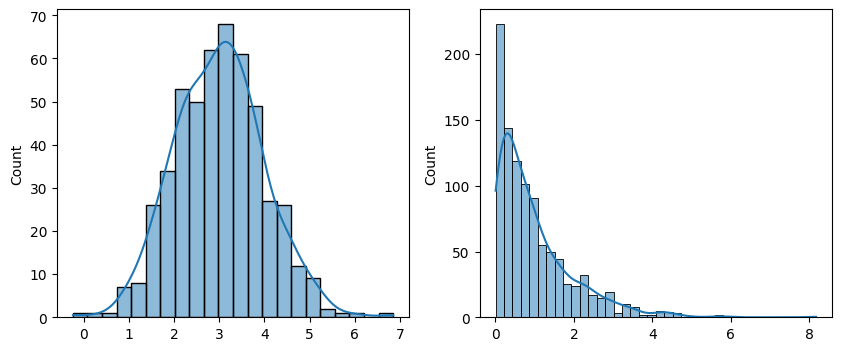

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
seaborn.histplot(amostra_inicial, ax=ax[0], kde=True)
seaborn.histplot(np.random.RandomState(42).exponential(size=1000), ax=ax[1], kde=True)
plt.show()

$\oint$ *No kernel gaussiano, temos uma dependência muito grande no valor de $\sigma$ que escolhemos para as gaussianas que colocamos ao redor dos pontos. Não é trivial escolher a melhor, mas você pode fazer um hould-out dos seus dados para depois calcular a verossimilhança da amostra reservada com cada uma das escolhas de $\sigma$ e ver qual tem melhor valor! ;)*

![](images_infer/kde_2.jpg)

Esse [vídeo](https://youtu.be/x5zLaWT5KPs) sobre o KDE é muito didático e útil.

___